# Trabajo Práctico N°4
## Grupo 2


In [364]:
!pip install pandas pyreadstat

In [365]:
import ISLP
from ISLP import load_data
from statsmodels.datasets import get_rdataset


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [366]:
ruta1 = "C:/Users/gabar/OneDrive/Documentos/bigdata/Individual_2004.dta"  
with open(ruta1, 'rb') as file:
    df1 = pd.read_stata(file)
df1.head()

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.00,1.00,Sí,2004.00,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.00,...,07,,06,06,,04,0.00,0.00,0.00,00000
1,125397,1.00,1.00,Sí,2004.00,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.00,...,00,,00,00,,00,0.00,0.00,0.00,00000
2,125515,1.00,1.00,Sí,2004.00,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.00,...,07,,07,07,,05,0.00,0.00,0.00,00020
3,125558,1.00,1.00,Sí,2004.00,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.00,...,08,,08,08,,06,0.00,0.00,0.00,00000
4,125558,1.00,2.00,Sí,2004.00,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.00,...,08,,08,08,,06,0.00,0.00,0.00,00000


In [367]:
# Filtramos por región igual a 'Gran Buenos Aires'
df1_gba = df1[df1['region'] == 'Gran Buenos Aires']

# Vemos las primeras filas del nuevo DataFrame filtrado
df1_gba.head()

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.00,1.00,Sí,2004.00,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.00,...,07,,06,06,,04,0.00,0.00,0.00,00000
1,125397,1.00,1.00,Sí,2004.00,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.00,...,00,,00,00,,00,0.00,0.00,0.00,00000
2,125515,1.00,1.00,Sí,2004.00,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.00,...,07,,07,07,,05,0.00,0.00,0.00,00020
3,125558,1.00,1.00,Sí,2004.00,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.00,...,08,,08,08,,06,0.00,0.00,0.00,00000
4,125558,1.00,2.00,Sí,2004.00,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.00,...,08,,08,08,,06,0.00,0.00,0.00,00000


In [374]:
ruta2 = "C:/Documentos/bigdata/usu_individual_T124.xlsx"

df2 = pd.read_excel(ruta2)

df2.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.00,12,12.00,12,12.00,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.00,12,12.00,12,12.00,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.00,12,12.00,12,12.00,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.00,6,6.00,6,6.00,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.00,6,6.00,6,6.00,NaN,6,1610


In [377]:
# Filtramos por región igual a 'Gran Buenos Aires'
df2_gba = df2[df2['REGION'] == 1]

# Vemos las primeras filas del nuevo DataFrame filtrado
df2_gba.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
245,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,1,1,1,S,33,1810,...,NaN,12,0.00,12,NaN,12,12.00,NaN,12,0
246,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,2,1,1,S,33,1810,...,NaN,12,0.00,12,NaN,12,12.00,NaN,12,0
247,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,3,1,1,S,33,1810,...,NaN,12,0.00,12,NaN,12,12.00,NaN,12,0
255,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1,1,1,1,S,33,2368,...,NaN,6,500000.00,9,NaN,9,9.00,NaN,9,3324
256,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1,1,1,1,S,33,1223,...,NaN,12,0.00,12,NaN,12,12.00,NaN,12,0


In [379]:
#Ya que queremos unir los df, tenemos que hacer que se lean igual, asi que ponemos todos los nombres de categorias en minúsculas
df1_gba.columns = df1_gba.columns.str.lower()
df2_gba.columns = df2_gba.columns.str.lower()
df2_gba.columns

Index(['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'pondih'],
      dtype='object', length=177)

In [381]:
# ch03: Parentesco
df2_gba['ch03'] = df2_gba['ch03'].replace({
    1: 'Jefe/a',
    2: 'Cónyuge/pareja',
    3: 'Hijo / hijastro/a',
    4: 'Yerno / nuera',
    5: 'Nieto/a',
    6: 'Madre / padre',
    7: 'Suegro/a',
    8: 'Hermano/a',
    9: 'Otros familiares',
    10: 'No familiares'
})

# ch04: Sexo
df2_gba['ch04'] = df2_gba['ch04'].replace({
    1: 'Varón',
    2: 'Mujer'
})

# ch10: Asistencia escolar
df2_gba['ch10'] = df2_gba['ch10'].replace({
    1: 'Sí, asiste',
    2: 'No asiste, pero asistió',
    3: 'Nunca asistió'
})

# ch12: Nivel educativo
df2_gba['ch12'] = df2_gba['ch12'].replace({
    1: 'Jardín/preescolar',
    2: 'Primario',
    3: 'EGB',
    4: 'Secundario',
    5: 'Polimodal',
    6: 'Terciario',
    7: 'Universitario',
    8: 'Posgrado universitario',
    9: 'Educación especial (discapacitado)'
})

# ch13: Alfabetización
df2_gba['ch13'] = df2_gba['ch13'].replace({
    1: 'Sí',
    2: 'No',
    3: 'Ns/Nr'
})

# ch14: Año o grado
df2_gba['ch14'] = df2_gba['ch14'].replace({
    0: 'Ninguno',
    1: 'Primero',
    2: 'Segundo',
    3: 'Tercero',
    4: 'Cuarto',
    5: 'Quinto',
    6: 'Sexto',
    7: 'Séptimo',
    8: 'Octavo',
    9: 'Noveno',
    98: 'Educación especial',
    99: 'Ns/Nr'
})

C:\Users\gabar\AppData\Local\Temp\ipykernel_29964\4219386038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gba['ch03'] = df2_gba['ch03'].replace({
C:\Users\gabar\AppData\Local\Temp\ipykernel_29964\4219386038.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gba['ch04'] = df2_gba['ch04'].replace({
C:\Users\gabar\AppData\Local\Temp\ipykernel_29964\4219386038.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [383]:
# estado: Condición de actividad
df2_gba['estado'] = df2_gba['estado'].replace({
    0: 'Entrevista individual no realizada (no respuesta al cuestionario individual)',
    1: 'Ocupado',
    2: 'Desocupado',
    3: 'Inactivo',
    4: 'Menor de 10 años'
})



C:\Users\gabar\AppData\Local\Temp\ipykernel_29964\3110710856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gba['estado'] = df2_gba['estado'].replace({


In [385]:
# Seleccionamos solo las columnas que queremos de ambas bases de datos
columns_to_keep = ['ano4', 'mas_500', 'ch03', 'ch04', 'ch06', 'ch10', 'ch12', 
                   'ch13', 'ch14', 'estado','p21']

# Aseguramos que ambas bases tengan solo las columnas necesarias
df1_filtered = df1_gba[columns_to_keep]
df2_filtered = df2_gba[columns_to_keep]



In [387]:
# Vemos los datos de la variable 'estado' en 2004
estado_data4 = df1_filtered['estado']

# Mostrar los datos
estado_data4.value_counts()

estado
Ocupado                                                         3079
Inactivo                                                        2800
Menor de 10 años                                                1230
Desocupado                                                       528
Entrevista individual no realizada (no respuesta al cuestion      10
Name: count, dtype: int64

In [389]:
# Creamos bases para los que respondieron en 2004
respondieron4 = df1_filtered[df1_filtered['estado'] != 'Entrevista individual no realizada (no respuesta al cuestion']
respondieron4.head(5)

,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,ch13,ch14,estado,p21
0,2004.00,S,Jefe,Varón,79.00,"No asiste, pero asistió",Secundario,No,03,Inactivo,0.00
1,2004.00,S,Jefe,Mujer,67.00,"No asiste, pero asistió",Primario,Sí,,Ocupado,0.00
2,2004.00,S,Jefe,Mujer,74.00,"No asiste, pero asistió",Primario,Sí,,Inactivo,0.00
3,2004.00,S,Jefe,Varón,54.00,"No asiste, pero asistió",Primario,Sí,,Ocupado,2000.00
4,2004.00,S,Cónyuge/Pareja,Mujer,51.00,"No asiste, pero asistió",Universitario,Sí,,Inactivo,0.00


In [391]:
# Vemos los datos de la variable 'estado' en 2024
estado_data24 = df2_filtered['estado']

# Mostrar los datos
estado_data24.value_counts()

estado
Ocupado                                                                         3224
Inactivo                                                                        2662
Menor de 10 años                                                                 813
Desocupado                                                                       311
Entrevista individual no realizada (no respuesta al cuestionario individual)      41
Name: count, dtype: int64

In [393]:
# Creamos bases para los que respondieron en 2024
respondieron24 = df2_filtered[df2_filtered['estado'] != 'Entrevista individual no realizada (no respuesta al cuestion']
respondieron24.head(5)

,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,ch13,ch14,estado,p21
245,2024,S,Jefe/a,Mujer,85,"No asiste, pero asistió",Primario,Sí,NaN,Ocupado,400000
246,2024,S,Hijo / hijastro/a,Varón,59,"No asiste, pero asistió",Universitario,Sí,NaN,Ocupado,-9
247,2024,S,Yerno / nuera,Mujer,57,"No asiste, pero asistió",Universitario,Sí,NaN,Ocupado,-9
255,2024,S,Jefe/a,Varón,26,"No asiste, pero asistió",Universitario,Sí,NaN,Ocupado,500000
256,2024,S,Jefe/a,Mujer,88,"No asiste, pero asistió",Primario,No,Segundo,Inactivo,0


In [395]:
respondieron4 = respondieron4.copy()

# Ajustamos ingresos de 2004 a precios de 2024
respondieron4['p21_ajustado'] = respondieron4['p21'] * 1031.91

# Calculamos salario semanal suponiendo jornada completa (40 hs semanales)
respondieron4['salario_semanal'] = respondieron4['p21_ajustado'] / 40
respondieron4.head(5)

,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,ch13,ch14,estado,p21,p21_ajustado,salario_semanal
0,2004.00,S,Jefe,Varón,79.00,"No asiste, pero asistió",Secundario,No,03,Inactivo,0.00,0.00,0.00
1,2004.00,S,Jefe,Mujer,67.00,"No asiste, pero asistió",Primario,Sí,,Ocupado,0.00,0.00,0.00
2,2004.00,S,Jefe,Mujer,74.00,"No asiste, pero asistió",Primario,Sí,,Inactivo,0.00,0.00,0.00
3,2004.00,S,Jefe,Varón,54.00,"No asiste, pero asistió",Primario,Sí,,Ocupado,2000.00,2063820.00,51595.50
4,2004.00,S,Cónyuge/Pareja,Mujer,51.00,"No asiste, pero asistió",Universitario,Sí,,Inactivo,0.00,0.00,0.00


In [397]:
# Filtramos valores negativos o nulos antes de calcular el salario semanal del 2024
respondieron24 = respondieron24[respondieron24['p21'] > 0].copy()

# Calculamos el salario semanal en 2024
respondieron24['salario_semanal'] = respondieron24['p21'] / 40

In [399]:
respondieron4 = respondieron4.copy()
respondieron4['ch06'] = pd.to_numeric(respondieron4['ch06'], errors='coerce')
respondieron4['edad2'] = respondieron4['ch06'] ** 2
respondieron4['edad2']

0      6241.00
1      4489.00
2      5476.00
3      2916.00
4      2601.00
         ...  
7642      1.00
7643   2601.00
7644   3025.00
7645    144.00
7646    484.00
Name: edad2, Length: 7637, dtype: float64

In [401]:
respondieron24['ch06'] = pd.to_numeric(respondieron24['ch06'], errors='coerce')
respondieron24['edad2'] = respondieron24['ch06'] ** 2
respondieron24['edad2']

245      7225
255       676
273      4356
402      3136
404      3844
         ... 
46034    2916
46035    2809
46036     676
46040    1156
46045    1849
Name: edad2, Length: 2192, dtype: int64

In [403]:
# Diccionario base: años de educación si el nivel está COMPLETO
educacion_completa = {
    "Jardín/preescolar": 0,
    "Primario": 7,
    "EGB": 7,
    "Secundario": 13,       # 7 (primaria) + 6 (secundaria)
    "Polimodal": 13,        # Igual que secundario
    "Terciario": 16,        # 13 + 3
    "Universitario": 18,    # 13 + 5
    "Posgrado universitario": 20,  # 18 + 2
    "Educación especial (discapacitado)": np.nan
}

# Diccionario: cantidad de años aprobados si NO finalizó el nivel
anios_aprobados = {
    "Ninguno": 0,
    "Primero": 1,
    "Segundo": 2,
    "Tercero": 3,
    "Cuarto": 4,
    "Quinto": 5,
    "Sexto": 6,
    "Séptimo": 7,
    "Octavo": 8,
    "Noveno": 9,
    "Educación especial": np.nan,
    "Ns/Nr": np.nan
}

# Función para calcular los años de educación
def calcular_educ(row):
    nivel = row['ch12']
    finalizo = row['ch13']
    ultimo_anio = row['ch14']
    
    if nivel not in educacion_completa:
        return np.nan
    
    if finalizo == "Sí":
        return educacion_completa[nivel]
    else:
        if nivel in ["Primario", "EGB"]:
            base = 0
        elif nivel in ["Secundario", "Polimodal"]:
            base = 7
        elif nivel in ["Terciario", "Universitario"]:
            base = 13
        elif nivel == "Posgrado universitario":
            base = 18
        else:
            base = 0
        
        return base + anios_aprobados.get(ultimo_anio, np.nan)


respondieron4 = respondieron4.copy()

# Aplicar la función
respondieron4['educ'] = respondieron4.apply(calcular_educ, axis=1)

# Mostrar la nueva variable (opcional)
respondieron4[['ch12', 'ch13', 'ch14', 'educ']].head(20)

,ch12,ch13,ch14,educ
0,Secundario,No,03,NaN
1,Primario,Sí,,7.00
2,Primario,Sí,,7.00
3,Primario,Sí,,7.00
4,Universitario,Sí,,18.00
5,Universitario,No,04,NaN
6,Terciario,No,02,NaN
7,Secundario,Sí,,13.00
8,Secundario,Sí,,13.00
9,Secundario,No,03,NaN


## A. Enfoque de validación

In [406]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [408]:
# Cambiamos el formato a la salida 
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Inspección rápida de las variables y sus valores
respondieron4.describe()

,ano4,ch06,p21,p21_ajustado,salario_semanal,edad2,educ
count,7637.00,7502.00,7637.00,7637.00,7637.00,7502.00,3228.00
mean,2004.00,34.18,263.50,271909.43,6797.74,1672.14,10.97
std,0.00,22.44,823.19,849454.19,21236.35,1837.56,4.04
min,2004.00,1.00,0.00,0.00,0.00,1.00,7.00
25%,2004.00,15.00,0.00,0.00,0.00,225.00,7.00
50%,2004.00,30.00,0.00,0.00,0.00,900.00,13.00
75%,2004.00,51.00,350.00,361168.50,9029.21,2601.00,13.00
max,2004.00,96.00,54000.00,55723140.00,1393078.50,9216.00,18.00


In [410]:
# Crear la dummy 'estado_desocupado'
respondieron4['estado_desocupado'] = (respondieron4['estado'] == 'Desocupado').astype(int)
respondieron4['estado_desocupado']

0       0
1       0
2       0
3       0
4       0
       ..
7642    0
7643    0
7644    0
7645    0
7646    0
Name: estado_desocupado, Length: 7637, dtype: int32

In [412]:
# Lista de los prefijos dummy que queremos convertir
prefijos = ['estado_desocupado', 'ch03_Jefe', 'ch03_Cónyuge/Pareja', 'ch03_Hijo/Hijastro', 'ch03_Yerno/Nuera',
    'ch03_Nieto', 'ch03_Madre/Padre', 'ch03_Suegro', 'ch03_Hermano',
    'ch03_Otros familiares', 'ch03_No familiares', 'ch04_Varón', 'ch04_Mujer',
    'ch10_0.0', 'ch10_Sí, asiste', 'ch10_No asiste, pero asistió',
    'ch10_Nunca asistió', 'ch10_Ns./Nr.', 'ch12_0.0', 'ch12_Jardín/Preescolar',
    'ch12_Primario', 'ch12_EGB', 'ch12_Secundario', 'ch12_Polimodal',
    'ch12_Terciario', 'ch12_Universitario', 'ch12_Posgrado Universitario',
    'ch12_Educación especial (discapacitado)', 'ch12_Ns./Nr.',
    'ch13_0.0', 'ch13_Sí', 'ch13_No', 'ch13_Ns./Nr.']

# Buscar las columnas que empiezan con esos prefijos
dummies_cols = [col for col in respondieron4.columns if any(col.startswith(pref) for pref in prefijos)]

# Convertir True/False a 1/0
respondieron4[dummies_cols] = respondieron4[dummies_cols].astype(int)

In [414]:
# Lista de columnas que queremos conservar
columnas_seleccionadas = [
    'ch06', 'salario_semanal', 'edad2',
    'ch03_Jefe', 'ch03_Cónyuge/Pareja', 'ch03_Hijo/Hijastro', 'ch03_Yerno/Nuera',
    'ch03_Nieto', 'ch03_Madre/Padre', 'ch03_Suegro', 'ch03_Hermano',
    'ch03_Otros familiares', 'ch03_No familiares', 'ch04_Varón', 'ch04_Mujer',
    'ch10_0.0', 'ch10_Sí, asiste', 'ch10_No asiste, pero asistió',
    'ch10_Nunca asistió', 'ch10_Ns./Nr.', 'ch12_0.0', 'ch12_Jardín/Preescolar',
    'ch12_Primario', 'ch12_EGB', 'ch12_Secundario', 'ch12_Polimodal',
    'ch12_Terciario', 'ch12_Universitario', 'ch12_Posgrado Universitario',
    'ch12_Educación especial (discapacitado)', 'ch12_Ns./Nr.',
    'ch13_0.0', 'ch13_Sí', 'ch13_No', 'ch13_Ns./Nr.', 'estado_desocupado'
]

# Creamos la nueva base solo con esas columnas
respondieron4_f = respondieron4[columnas_seleccionadas].copy()
respondieron4_f

KeyError: "['ch03_Jefe', 'ch03_Cónyuge/Pareja', 'ch03_Hijo/Hijastro', 'ch03_Yerno/Nuera', 'ch03_Nieto', 'ch03_Madre/Padre', 'ch03_Suegro', 'ch03_Hermano', 'ch03_Otros familiares', 'ch03_No familiares', 'ch04_Varón', 'ch04_Mujer', 'ch10_0.0', 'ch10_Sí, asiste', 'ch10_No asiste, pero asistió', 'ch10_Nunca asistió', 'ch10_Ns./Nr.', 'ch12_0.0', 'ch12_Jardín/Preescolar', 'ch12_Primario', 'ch12_EGB', 'ch12_Secundario', 'ch12_Polimodal', 'ch12_Terciario', 'ch12_Universitario', 'ch12_Posgrado Universitario', 'ch12_Educación especial (discapacitado)', 'ch12_Ns./Nr.', 'ch13_0.0', 'ch13_Sí', 'ch13_No', 'ch13_Ns./Nr.'] not in index"

In [416]:
#Sacamos las filas que tienen NaN para poder ajustar el modelo

respondieron4_f = respondieron4_f.dropna()

In [418]:
# Variable dependiente
y4 = respondieron4_f['estado_desocupado']

# Todas las columnas menos la variable dependiente
X4 = respondieron4_f.drop(columns='estado_desocupado')



In [420]:

# División de la base 2004
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4, y4,
    test_size=0.3,           # 30% para test, 70% para entrenamiento
    random_state=444         # semilla para reproducibilidad
)


In [422]:
# Instanciamos el modelo
modelo4_logit = LogisticRegression(max_iter=1000)  

# Ajustamos el modelo con los datos de entrenamiento
modelo4_logit.fit(X4_train, y4_train)

C:\Users\gabar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [424]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report
)

# Predicciones
y4_pred = modelo4_logit.predict(X4_test)
y4_proba = modelo4_logit.predict_proba(X4_test)[:, 1] 

# Métricas básicas
print("Accuracy:", accuracy_score(y4_test, y4_pred))
print("Precision:", precision_score(y4_test, y4_pred))
print("Recall:", recall_score(y4_test, y4_pred))
print("F1-score:", f1_score(y4_test, y4_pred))
print("ROC AUC:", roc_auc_score(y4_test, y4_proba))

Accuracy: 0.9204797867614394
Precision: 0.5
Recall: 0.1564245810055866
F1-score: 0.23829787234042554
ROC AUC: 0.9284797566920472



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2072
           1       0.50      0.16      0.24       179

    accuracy                           0.92      2251
   macro avg       0.72      0.57      0.60      2251
weighted avg       0.90      0.92      0.90      2251



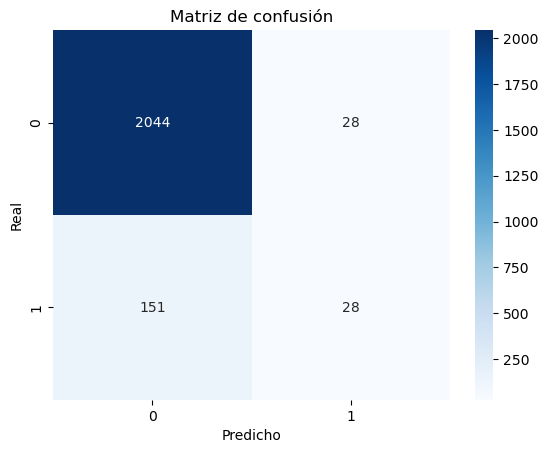

In [426]:

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y4_test, y4_pred))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y4_test, y4_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()


In [428]:
# Mostramos los coeficientes con sus nombres
coeficientes4 = pd.Series(modelo4_logit.coef_[0], index=X4.columns)
coeficientes4.sort_values(ascending=False)

ch12_Universitario                         0.93
ch03_Hermano                               0.54
ch03_No familiares                         0.52
ch12_Secundario                            0.26
ch03_Hijo/Hijastro                         0.24
ch06                                       0.23
ch10_No asiste, pero asistió               0.21
ch12_Terciario                             0.20
ch12_Posgrado Universitario                0.18
ch12_Primario                              0.08
ch10_Ns./Nr.                               0.00
edad2                                     -0.00
ch03_Suegro                               -0.02
ch03_Jefe                                 -0.05
ch12_Polimodal                            -0.12
salario_semanal                           -0.16
ch03_Madre/Padre                          -0.16
ch13_Ns./Nr.                              -0.18
ch12_Ns./Nr.                              -0.23
ch03_Otros familiares                     -0.32
ch12_EGB                                

In [430]:
# Base del 2004

# Crear variable dependiente: 1 si está desocupado, 0 en caso contrario
respondieron4['desocupado'] = (respondieron4['estado'] == 'Desocupado').astype(int)

# Seleccionamos variables independientes: todas menos 'estado' y 'desocupado'
X4 = respondieron4.drop(columns=['estado', 'desocupado'])
y4 = respondieron4['desocupado']

# Dividimos la muestra: 70% entrenamiento, 30% prueba — semilla 444
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, 
                                                    test_size=0.3, 
                                                    random_state=444)


print(f"X4_train: {X4_train.shape}, X4_test: {X4_test.shape}")
print(f"y4_train: {y4_train.shape}, y4_test: {y4_test.shape}")

X4_train: (5345, 15), X4_test: (2292, 15)
y4_train: (5345,), y4_test: (2292,)


In [432]:
# Calculamos las medias en cada conjunto
mean_train4 = X4_train.mean(numeric_only=True)
mean_test4 = X4_test.mean(numeric_only=True)

# Calculamos la diferencia de medias
diff_means4 = mean_train4 - mean_test4

# Creamos un DataFrame con los resultados
tabla_dif_medias4 = pd.DataFrame({
    'Media Train': mean_train4,
    'Media Test': mean_test4,
    'Diferencia': diff_means4
})


tabla_dif_medias4

,Media Train,Media Test,Diferencia
ano4,2004.00,2004.00,0.00
ch06,34.03,34.55,-0.53
p21,255.46,282.25,-26.78
p21_ajustado,263614.30,291253.90,-27639.60
salario_semanal,6590.36,7281.35,-690.99
edad2,1657.88,1705.35,-47.46
educ,10.96,10.98,-0.02
estado_desocupado,0.07,0.06,0.01


In [434]:
# Base del 2024

# Cambiamos el formato a la salida 
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Inspección rápida de las variables y sus valores
respondieron24.describe()

,ano4,ch06,p21,salario_semanal,edad2
count,2192.00,2192.00,2192.00,2192.00,2192.00
mean,2024.00,41.91,387347.67,9683.69,1945.04
std,0.00,13.73,453045.39,11326.13,1226.44
min,2024.00,14.00,3000.00,75.00,196.00
25%,2024.00,31.00,160000.00,4000.00,961.00
50%,2024.00,41.00,300000.00,7500.00,1681.00
75%,2024.00,52.00,500000.00,12500.00,2704.00
max,2024.00,92.00,8000000.00,200000.00,8464.00


In [436]:
# Crear la dummy 'estado_desocupado' en 2024
respondieron24['estado_desocupado'] = (respondieron24['estado'] == 'Desocupado').astype(int)
respondieron24['estado_desocupado']

245      0
255      0
273      0
402      0
404      0
        ..
46034    0
46035    0
46036    0
46040    0
46045    0
Name: estado_desocupado, Length: 2192, dtype: int32

In [438]:
# Variables a convertir en dummies
variables = ['ch03', 'ch04', 'ch10', 'ch12', 'ch13']

# Creamos dummies sin eliminar ninguna categoría
dummies = pd.get_dummies(respondieron24[variables],
                         prefix=variables,
                         prefix_sep='_',
                         dtype=int,
                         drop_first=False)

respondieron24 = pd.concat([respondieron24, dummies], axis=1)

# Creamos las dummies para 'estado'
respondieron24['estado_desocupado'] = (respondieron24['estado'] == 'Desocupado').astype(int)



# Mostramos las primeras 5 filas
respondieron24.head(5)

,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,ch13,ch14,estado,...,ch12_Polimodal,ch12_Posgrado universitario,ch12_Primario,ch12_Secundario,ch12_Terciario,ch12_Universitario,ch13_0,ch13_9,ch13_No,ch13_Sí
245,2024,S,Jefe/a,Mujer,85,"No asiste, pero asistió",Primario,Sí,NaN,Ocupado,...,0,0,1,0,0,0,0,0,0,1
255,2024,S,Jefe/a,Varón,26,"No asiste, pero asistió",Universitario,Sí,NaN,Ocupado,...,0,0,0,0,0,1,0,0,0,1
273,2024,S,Jefe/a,Varón,66,"No asiste, pero asistió",Universitario,Sí,NaN,Ocupado,...,0,0,0,0,0,1,0,0,0,1
402,2024,S,Jefe/a,Mujer,56,"No asiste, pero asistió",Primario,Sí,NaN,Ocupado,...,0,0,1,0,0,0,0,0,0,1
404,2024,S,Jefe/a,Varón,62,"No asiste, pero asistió",Universitario,No,Tercero,Ocupado,...,0,0,0,0,0,1,0,0,1,0


In [440]:
# Lista de los prefijos dummy que queremos convertir
prefijos = ['estado_desocupado', 'ch03_Jefe', 'ch03_Cónyuge/Pareja', 'ch03_Hijo/Hijastro', 'ch03_Yerno/Nuera',
    'ch03_Nieto', 'ch03_Madre/Padre', 'ch03_Suegro', 'ch03_Hermano',
    'ch03_Otros familiares', 'ch03_No familiares', 'ch04_Varón', 'ch04_Mujer',
    'ch10_0.0', 'ch10_Sí, asiste', 'ch10_No asiste, pero asistió',
    'ch10_Nunca asistió', 'ch10_Ns./Nr.', 'ch12_0.0', 'ch12_Jardín/Preescolar',
    'ch12_Primario', 'ch12_EGB', 'ch12_Secundario', 'ch12_Polimodal',
    'ch12_Terciario', 'ch12_Universitario', 'ch12_Posgrado Universitario',
    'ch12_Educación especial (discapacitado)', 'ch12_Ns./Nr.',
    'ch13_0.0', 'ch13_Sí', 'ch13_No', 'ch13_Ns./Nr.']

# Buscar las columnas que empiezan con esos prefijos
dummies_cols = [col for col in respondieron24.columns if any(col.startswith(pref) for pref in prefijos)]

# Convertir True/False a 1/0
respondieron24[dummies_cols] = respondieron24[dummies_cols].astype(int)


In [442]:
# Lista de columnas que queremos conservar
columnas_seleccionadas = [
    'ch06', 'salario_semanal', 'edad2',
    'ch03_Jefe', 'ch03_Cónyuge/Pareja', 'ch03_Hijo/Hijastro', 'ch03_Yerno/Nuera',
    'ch03_Nieto', 'ch03_Madre/Padre', 'ch03_Suegro', 'ch03_Hermano',
    'ch03_Otros familiares', 'ch03_No familiares', 'ch04_Varón', 'ch04_Mujer',
    'ch10_0.0', 'ch10_Sí, asiste', 'ch10_No asiste, pero asistió',
    'ch10_Nunca asistió', 'ch10_Ns./Nr.', 'ch12_0.0', 'ch12_Jardín/Preescolar',
    'ch12_Primario', 'ch12_EGB', 'ch12_Secundario', 'ch12_Polimodal',
    'ch12_Terciario', 'ch12_Universitario', 'ch12_Posgrado Universitario',
    'ch12_Educación especial (discapacitado)', 'ch12_Ns./Nr.',
    'ch13_0.0', 'ch13_Sí', 'ch13_No', 'ch13_Ns./Nr.', 'estado_desocupado'
]

# Creamos la nueva base solo con esas columnas
respondieron24_f = respondieron24[columnas_seleccionadas].copy()
respondieron24_f

KeyError: "['ch03_Jefe', 'ch03_Cónyuge/Pareja', 'ch03_Hijo/Hijastro', 'ch03_Yerno/Nuera', 'ch03_Nieto', 'ch03_Madre/Padre', 'ch03_Suegro', 'ch03_Hermano', 'ch10_0.0', 'ch10_Ns./Nr.', 'ch12_0.0', 'ch12_Jardín/Preescolar', 'ch12_Posgrado Universitario', 'ch12_Ns./Nr.', 'ch13_0.0', 'ch13_Ns./Nr.'] not in index"

## B. Metodo Supervisado 1: Modelo de Regresión Lineal

In [450]:
!pip install statsmodels

In [451]:
#Sacamos las filas que tienen NaN para poder ajustar el modelo

respondieron4_f = respondieron4_f.dropna()

In [ ]:
# Variable dependiente
y4 = respondieron4_f['salario_semanal']

# Todas las columnas menos la variable dependiente
X4 = respondieron4_f['educ']


In [ ]:
# Base 2004

X4_train_edad = X4_train[['ch06']]
X4_test_edad = X4_test[['ch06']]
y4_train_salario = X4_train['salario_semanal']
y4_test_salario = X4_test['salario_semanal']

# Creamos y ajustamos el modelo
modelo4_lineal = LinearRegression()
modelo4_lineal.fit(X4_train_edad, y4_train_salario)

# Predicciones
y4_pred = modelo4_lineal.predict(X4_test_edad)

# Evaluamos del modelo
mse4 = mean_squared_error(y4_test_salario, y4_pred)
r2_4 = r2_4_score(y4_test_salario, y4_pred)

# Resultados
print("Coeficiente (pendiente):", modelo4_lineal.coef_[0])
print("Intercepto:", modelo4_lineal.intercept_)
print("MSE (Error cuadrático medio):", mse4)
print("R² (Coeficiente de determinación):", r2_4)

In [ ]:
# Base 2024

X24_train_edad = X24_train[['ch06']]
X24_test_edad = X24_test[['ch06']]
y24_train_salario = X24_train['salario_semanal']
y24_test_salario = X24_test['salario_semanal']

# Creamos y ajustamos el modelo
modelo_lineal24 = LinearRegression()
modelo_lineal24.fit(X24_train_edad, y24_train_salario)

# Predicciones
y24_pred = modelo_lineal24.predict(X24_test_edad)

# Evaluamos del modelo
mse24 = mean_squared_error(y24_test_salario, y24_pred)
r224 = r2_score(y24_test_salario, y24_pred)

# Resultados
print("Coeficiente (pendiente):", modelo_lineal24.coef_[0])
print("Intercepto:", modelo_lineal24.intercept_)
print("MSE (Error cuadrático medio):", mse24)
print("R² (Coeficiente de determinación):", r224)